In [1]:
#Importando pacotes para analise e tratamento de dados
import sys, os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Modulos com funções para tratamento de dados
sys.path.append(os.path.abspath(os.path.join('modulos')))
from modulo01 import *
from modulo02 import *
from modulo03 import *

In [3]:
pd.set_option('display.max_columns', 100)

In [4]:
df_original = pd.read_csv("fa_casoshumanos_1994_2021.csv")
df_original.head(50)

,ID,MACRORREG_LPI,COD_UF_LPI,UF_LPI,COD_MUN_LPI,MUN_LPI,SEXO,IDADE,DT_IS,SE_IS,MES_IS,ANO_IS,MONITORAMENTO_IS,OBITO
0,1,N,14,RR,140005.0,Alto Alegre,M,NaN,29/11/1994,48.0,11.0,1994,1994/1995,SIM
1,2,N,14,RR,140045.0,Pacaraima,M,19.0,19/02/1995,8.0,2.0,1995,1994/1995,NAO
2,3,NE,21,MA,210060.0,Amarante do Maranhao,M,32.0,01/04/1995,13.0,4.0,1995,1994/1995,IGN
3,4,NE,21,MA,210060.0,Amarante do Maranhao,M,33.0,03/04/1995,14.0,4.0,1995,1994/1995,SIM
4,5,N,15,PA,150270.0,Conceicao do Araguaia,M,26.0,12/04/1995,15.0,4.0,1995,1994/1995,SIM
5,6,N,13,AM,130410.0,Tapaua,M,29.0,26/01/1996,4.0,1.0,1996,1995/1996,SIM
6,7,N,13,AM,130356.0,Rio Preto da Eva,M,38.0,27/01/1996,4.0,1.0,1996,1995/1996,SIM
7,8,N,13,AM,130255.0,Manaquiri,M,46.0,30/01/1996,5.0,1.0,1996,1995/1996,SIM
8,9,N,13,AM,130250.0,Manacapuru,M,20.0,11/02/1996,7.0,2.0,1996,1995/1996,SIM
9,10,N,13,AM,130360.0,Santa Isabel do Rio Negro,M,27.0,NaN,NaN,NaN,1996,1995/1996,SIM


In [5]:
#Criando copia do dataframe original
df_clean = df_original.copy()

In [6]:
#Convertendo todas as letras da coluna nome do municipio para maiusculas
df_clean['MUN_LPI'] = df_clean['MUN_LPI'].str.upper()
df_clean.head(50)

,ID,MACRORREG_LPI,COD_UF_LPI,UF_LPI,COD_MUN_LPI,MUN_LPI,SEXO,IDADE,DT_IS,SE_IS,MES_IS,ANO_IS,MONITORAMENTO_IS,OBITO
0,1,N,14,RR,140005.0,ALTO ALEGRE,M,NaN,29/11/1994,48.0,11.0,1994,1994/1995,SIM
1,2,N,14,RR,140045.0,PACARAIMA,M,19.0,19/02/1995,8.0,2.0,1995,1994/1995,NAO
2,3,NE,21,MA,210060.0,AMARANTE DO MARANHAO,M,32.0,01/04/1995,13.0,4.0,1995,1994/1995,IGN
3,4,NE,21,MA,210060.0,AMARANTE DO MARANHAO,M,33.0,03/04/1995,14.0,4.0,1995,1994/1995,SIM
4,5,N,15,PA,150270.0,CONCEICAO DO ARAGUAIA,M,26.0,12/04/1995,15.0,4.0,1995,1994/1995,SIM
5,6,N,13,AM,130410.0,TAPAUA,M,29.0,26/01/1996,4.0,1.0,1996,1995/1996,SIM
6,7,N,13,AM,130356.0,RIO PRETO DA EVA,M,38.0,27/01/1996,4.0,1.0,1996,1995/1996,SIM
7,8,N,13,AM,130255.0,MANAQUIRI,M,46.0,30/01/1996,5.0,1.0,1996,1995/1996,SIM
8,9,N,13,AM,130250.0,MANACAPURU,M,20.0,11/02/1996,7.0,2.0,1996,1995/1996,SIM
9,10,N,13,AM,130360.0,SANTA ISABEL DO RIO NEGRO,M,27.0,NaN,NaN,NaN,1996,1995/1996,SIM


In [7]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2758 entries, 0 to 2757
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                2758 non-null   int64  
 1   MACRORREG_LPI     2758 non-null   object 
 2   COD_UF_LPI        2758 non-null   int64  
 3   UF_LPI            2758 non-null   object 
 4   COD_MUN_LPI       2751 non-null   float64
 5   MUN_LPI           2752 non-null   object 
 6   SEXO              2757 non-null   object 
 7   IDADE             2756 non-null   float64
 8   DT_IS             2755 non-null   object 
 9   SE_IS             2742 non-null   float64
 10  MES_IS            2747 non-null   float64
 11  ANO_IS            2758 non-null   int64  
 12  MONITORAMENTO_IS  2758 non-null   object 
 13  OBITO             2758 non-null   object 
dtypes: float64(4), int64(3), object(7)
memory usage: 301.8+ KB


In [8]:
df_clean.shape

(2758, 14)

In [9]:
#Verificando quantidade de valores ausentes por coluna
df_missing = func_calc_percentual_valores_ausentes_coluna(df_clean)
df_missing

O dataset tem 14 colunas.
Encontrado: 7 colunas que têm valores ausentes.


,Valores Ausentes,% de Valores Ausentes,Dtype
SE_IS,16,0.58,float64
MES_IS,11,0.40,float64
COD_MUN_LPI,7,0.25,float64
MUN_LPI,6,0.22,object
DT_IS,3,0.11,object
IDADE,2,0.07,float64
SEXO,1,0.04,object


In [10]:
#Removendo colunas que possuam mais de 30% de valores ausentes
colunas_para_remover = df_missing[df_missing['% de Valores Ausentes'] >= 30.00].index.tolist()

In [11]:
df_clean = df_clean.drop(colunas_para_remover, axis = 1)
df_clean.shape

(2758, 14)

In [12]:
#Verificando quantidade de valores ausentes por coluna
func_calc_percentual_valores_ausentes_coluna(df_clean)

O dataset tem 14 colunas.
Encontrado: 7 colunas que têm valores ausentes.


,Valores Ausentes,% de Valores Ausentes,Dtype
SE_IS,16,0.58,float64
MES_IS,11,0.40,float64
COD_MUN_LPI,7,0.25,float64
MUN_LPI,6,0.22,object
DT_IS,3,0.11,object
IDADE,2,0.07,float64
SEXO,1,0.04,object


In [13]:
#Verificando valores ausentes por linha
func_calc_percentual_valores_ausentes_linha(df_clean)

0.87 % das linhas no conjunto de dados contêm pelo menos um valor ausente.


In [14]:
#Devido ao baixo número de linhas com valores ausentes, apliquei funcao para excluir linhas com valores faltantes
drop_rows_with_missing_values(df_clean)
df_clean.shape

24 linhas contendo valores ausentes foram descartadas.


(2734, 14)

In [15]:
#Confirmando que linhas foram removidas
func_calc_percentual_valores_ausentes_linha(df_clean)

0.0 % das linhas no conjunto de dados contêm pelo menos um valor ausente.


In [16]:
#Convertendo colunas de float para inteiro
convert_to_int(df_clean, ['MES_IS', 'COD_MUN_LPI', 'IDADE'])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2734 entries, 1 to 2757
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                2734 non-null   int64  
 1   MACRORREG_LPI     2734 non-null   object 
 2   COD_UF_LPI        2734 non-null   int64  
 3   UF_LPI            2734 non-null   object 
 4   COD_MUN_LPI       2734 non-null   int64  
 5   MUN_LPI           2734 non-null   object 
 6   SEXO              2734 non-null   object 
 7   IDADE             2734 non-null   int64  
 8   DT_IS             2734 non-null   object 
 9   SE_IS             2734 non-null   float64
 10  MES_IS            2734 non-null   int64  
 11  ANO_IS            2734 non-null   int64  
 12  MONITORAMENTO_IS  2734 non-null   object 
 13  OBITO             2734 non-null   object 
dtypes: float64(1), int64(6), object(7)
memory usage: 320.4+ KB


In [17]:
df_clean.head(50)

,ID,MACRORREG_LPI,COD_UF_LPI,UF_LPI,COD_MUN_LPI,MUN_LPI,SEXO,IDADE,DT_IS,SE_IS,MES_IS,ANO_IS,MONITORAMENTO_IS,OBITO
1,2,N,14,RR,140045,PACARAIMA,M,19,19/02/1995,8.0,2,1995,1994/1995,NAO
2,3,NE,21,MA,210060,AMARANTE DO MARANHAO,M,32,01/04/1995,13.0,4,1995,1994/1995,IGN
3,4,NE,21,MA,210060,AMARANTE DO MARANHAO,M,33,03/04/1995,14.0,4,1995,1994/1995,SIM
4,5,N,15,PA,150270,CONCEICAO DO ARAGUAIA,M,26,12/04/1995,15.0,4,1995,1994/1995,SIM
5,6,N,13,AM,130410,TAPAUA,M,29,26/01/1996,4.0,1,1996,1995/1996,SIM
6,7,N,13,AM,130356,RIO PRETO DA EVA,M,38,27/01/1996,4.0,1,1996,1995/1996,SIM
7,8,N,13,AM,130255,MANAQUIRI,M,46,30/01/1996,5.0,1,1996,1995/1996,SIM
8,9,N,13,AM,130250,MANACAPURU,M,20,11/02/1996,7.0,2,1996,1995/1996,SIM
10,11,N,13,AM,130110,CAREIRO,F,23,13/03/1996,11.0,3,1996,1995/1996,SIM
11,12,N,13,AM,130010,ANORI,M,14,14/03/1996,11.0,3,1996,1995/1996,SIM


In [18]:
#Agora, verificar pq a coluna SE_IS está como string
df_clean['SE_IS'].value_counts()

3.0     376
2.0     308
4.0     272
1.0     224
7.0     194
5.0     188
6.0     149
8.0     130
9.0     116
10.0    116
52.0     83
12.0     82
11.0     82
13.0     62
14.0     59
15.0     49
51.0     40
16.0     35
17.0     25
18.0     23
19.0     15
50.0     14
49.0     10
24.0      7
20.0      7
21.0      6
23.0      6
45.0      5
27.0      5
26.0      4
25.0      4
22.0      4
53.0      3
36.0      3
28.0      3
47.0      3
35.0      2
34.0      2
30.0      2
39.0      2
42.0      2
38.0      2
37.0      2
32.0      2
44.0      1
41.0      1
33.0      1
29.0      1
31.0      1
40.0      1
Name: SE_IS, dtype: int64

In [19]:
#Coluna tem numeros inteiros e datas, tornando a variavel impossivel de ser aproveitada. Coluna sera removida. Vou remover também colunas de ids identificadores, ja que não tem utilidade para analise
drop_columns(df_clean, ['SE_IS','ID', 'COD_UF_LPI', 'COD_MUN_LPI'])
df_clean.shape

4 colunas foram descartadas.


(2734, 10)

In [20]:
df_clean.head(50)

,MACRORREG_LPI,UF_LPI,MUN_LPI,SEXO,IDADE,DT_IS,MES_IS,ANO_IS,MONITORAMENTO_IS,OBITO
1,N,RR,PACARAIMA,M,19,19/02/1995,2,1995,1994/1995,NAO
2,NE,MA,AMARANTE DO MARANHAO,M,32,01/04/1995,4,1995,1994/1995,IGN
3,NE,MA,AMARANTE DO MARANHAO,M,33,03/04/1995,4,1995,1994/1995,SIM
4,N,PA,CONCEICAO DO ARAGUAIA,M,26,12/04/1995,4,1995,1994/1995,SIM
5,N,AM,TAPAUA,M,29,26/01/1996,1,1996,1995/1996,SIM
6,N,AM,RIO PRETO DA EVA,M,38,27/01/1996,1,1996,1995/1996,SIM
7,N,AM,MANAQUIRI,M,46,30/01/1996,1,1996,1995/1996,SIM
8,N,AM,MANACAPURU,M,20,11/02/1996,2,1996,1995/1996,SIM
10,N,AM,CAREIRO,F,23,13/03/1996,3,1996,1995/1996,SIM
11,N,AM,ANORI,M,14,14/03/1996,3,1996,1995/1996,SIM


In [21]:
#Verificando a variavel ano.
df_clean['ANO_IS'].value_counts()

2018    1306
2017     799
2019      90
2000      78
1999      73
2003      65
2016      51
2009      47
2008      46
2001      41
1998      33
2020      18
2002      14
2007      14
1996      14
2021      11
2015       9
2004       5
1995       4
2013       3
2005       3
1997       3
2011       2
2010       2
2006       2
2014       1
Name: ANO_IS, dtype: int64

In [22]:
# A variavel DT_IS trata da data de diagostico da febre amarela. Como as ocorrencias são uma amostragem de mais de 20 anos e a media é bem inferior a um por dia, não faz sentido ter essa coluna, já que possui a variavel mes e ano
drop_columns(df_clean, ['DT_IS'])
df_clean.head(20)

1 coluna foi descartada.


,MACRORREG_LPI,UF_LPI,MUN_LPI,SEXO,IDADE,MES_IS,ANO_IS,MONITORAMENTO_IS,OBITO
1,N,RR,PACARAIMA,M,19,2,1995,1994/1995,NAO
2,NE,MA,AMARANTE DO MARANHAO,M,32,4,1995,1994/1995,IGN
3,NE,MA,AMARANTE DO MARANHAO,M,33,4,1995,1994/1995,SIM
4,N,PA,CONCEICAO DO ARAGUAIA,M,26,4,1995,1994/1995,SIM
5,N,AM,TAPAUA,M,29,1,1996,1995/1996,SIM
6,N,AM,RIO PRETO DA EVA,M,38,1,1996,1995/1996,SIM
7,N,AM,MANAQUIRI,M,46,1,1996,1995/1996,SIM
8,N,AM,MANACAPURU,M,20,2,1996,1995/1996,SIM
10,N,AM,CAREIRO,F,23,3,1996,1995/1996,SIM
11,N,AM,ANORI,M,14,3,1996,1995/1996,SIM


Text(0.5, 0, 'Ano')

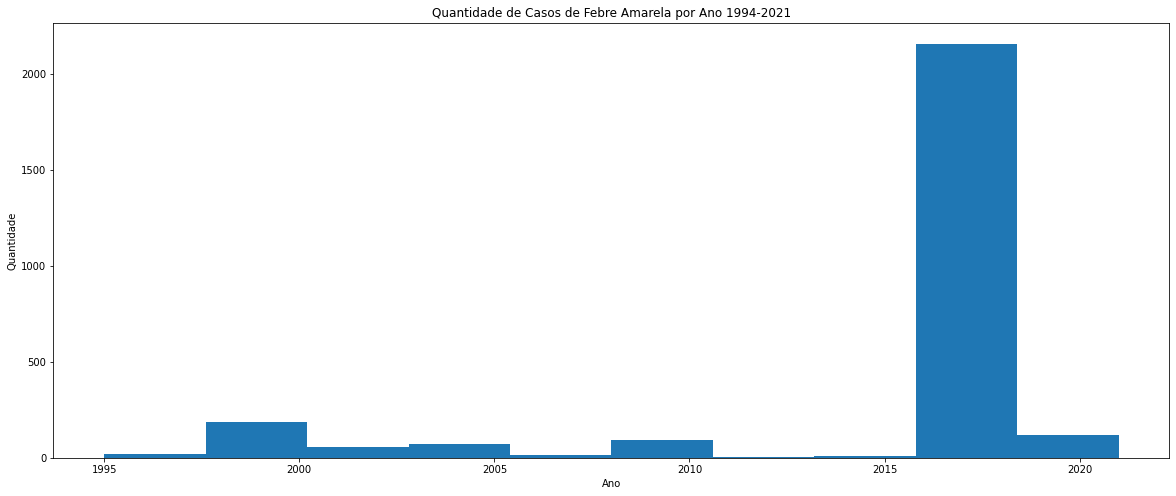

In [23]:
#Vamos as analises. Primeiro, vamos ver a quantidade de casos por ano. Houve uma disparada entre 2017 e 2018. Típicos outliers
plt.figure(figsize = (20,8))
plt.hist(df_clean['ANO_IS'])
plt.title('Quantidade de Casos de Febre Amarela por Ano 1994-2021')
plt.ylabel('Quantidade')
plt.xlabel('Ano')

Text(0.5, 1.0, 'Casos por Região')

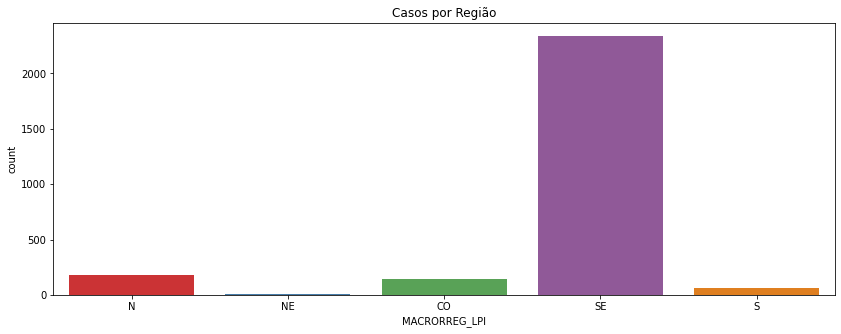

In [24]:
plt.figure(figsize = (14,5))
sns.countplot(x=df_clean['MACRORREG_LPI'], data=df_clean, palette="Set1")
plt.title('Casos por Região')

In [25]:
#Como os casos entre 2017 e 2018 foram muito acima do histórico, vou separar o dataframe desse periodo do restante
casos1718 = df_clean.loc[(df_clean['ANO_IS'] ==  2017 ) | ( df_clean['ANO_IS'] ==  2018)]
casos1718.shape

(2105, 9)

In [26]:
casosrest = df_clean.loc[~((df_clean['ANO_IS'] ==  2017 ) | ( df_clean['ANO_IS'] ==  2018))]
casosrest.shape

(629, 9)

Text(0.5, 1.0, 'Casos por Mês entre 2017-2018')

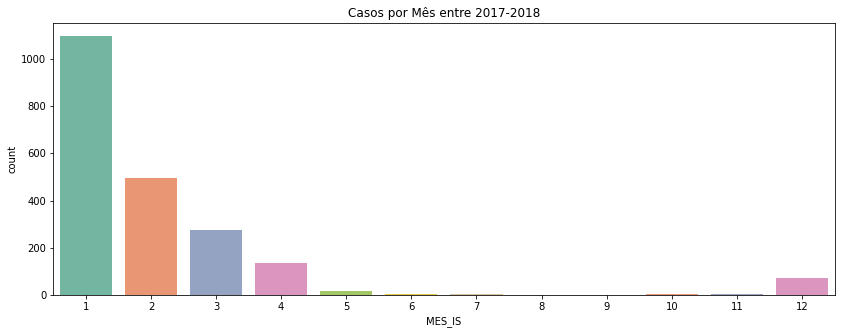

In [27]:
#Casos por mes no periodo 2017-2018. Nota-se que o pico foi no início do verão, caindo quase a zero no inverno e voltando na primavera
plt.figure(figsize = (14,5))
sns.countplot(x=casos1718['MES_IS'], data=casos1718, palette="Set2")
plt.title('Casos por Mês entre 2017-2018')

Text(0.5, 1.0, 'Óbitos de Febre Amarela entre 2017-2018')

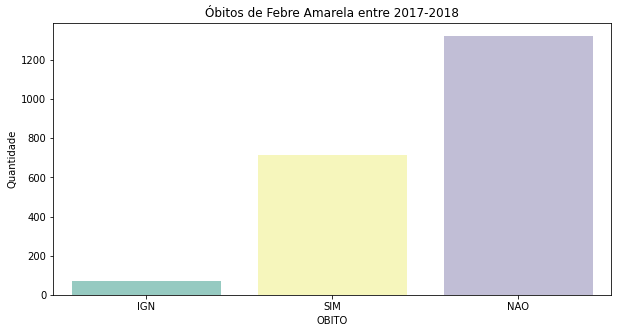

In [28]:
#Casos de óbitos entre 2017-2018. Aproximadamente 1 morte a cada três casos
plt.figure(figsize = (10,5))
sns.countplot(x=casos1718['OBITO'], data=casos1718, palette="Set3")
plt.ylabel('Quantidade')  
plt.title('Óbitos de Febre Amarela entre 2017-2018')

In [29]:
obitos = casos1718.loc[(casos1718['OBITO'] ==  'SIM' )]
obitos.shape

(713, 9)

Text(0.5, 1.0, 'Mortes por Idade entre 2017-2018')

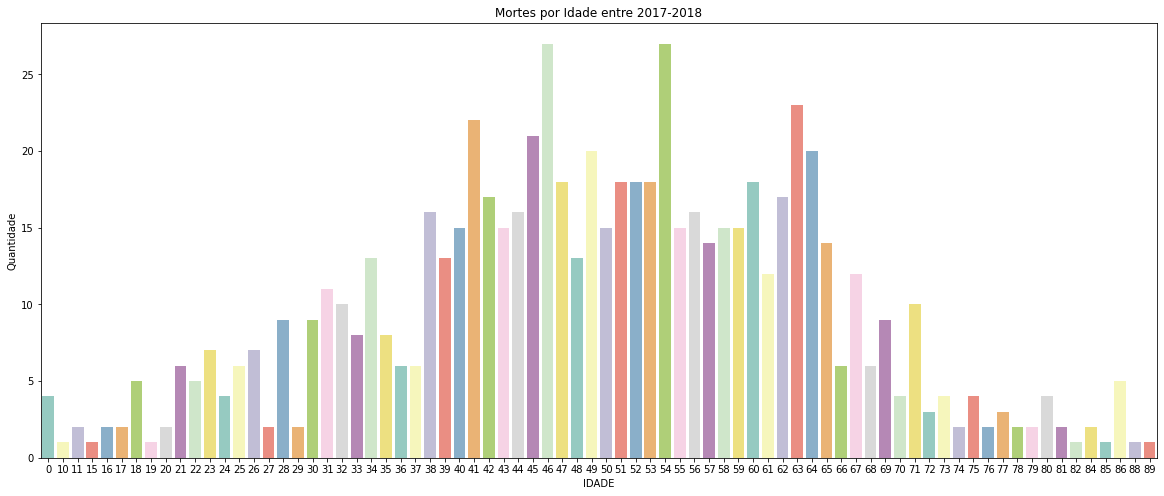

In [32]:
#Mortes por idade entre 2017-2018. Os maiores picos ficam acima dos 40 até 65
plt.figure(figsize = (20,8))
sns.countplot(x=obitos['IDADE'], data=obitos, palette="Set3")
plt.ylabel('Quantidade')  
plt.title('Mortes por Idade entre 2017-2018')

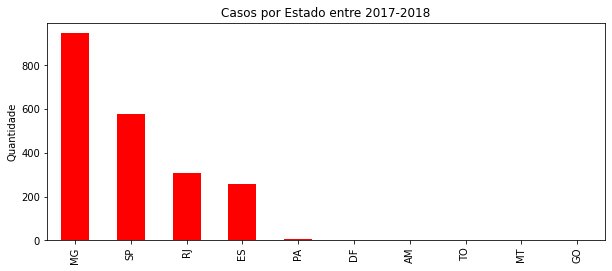

In [48]:
#Cidades com maiores numeros de casos entre 2017 e 2018
plt.figure(figsize = (10,4))
casos1718['UF_LPI'].value_counts().plot(kind="bar", color = 'r')
plt.ylabel('Quantidade')  
plt.title('Casos por Estado entre 2017-2018')
plt.show()

Text(0.5, 1.0, 'Quantidade de Óbitos entre 1995 a 2020, excluindo 2017 e 2018')

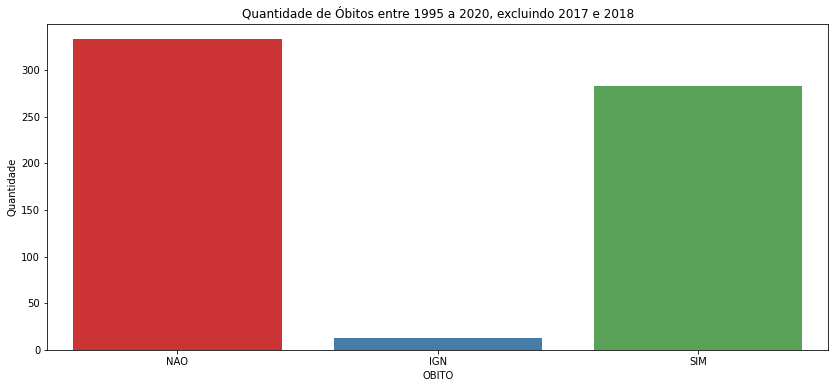

In [50]:
#Mortes por idade entre 2017-2018. Os maiores picos ficam acima dos 40 até 65
plt.figure(figsize = (14,6))
sns.countplot(x=casosrest['OBITO'], data=casosrest, palette="Set1")
plt.ylabel('Quantidade')  
plt.title('Quantidade de Óbitos entre 1995 a 2020, excluindo 2017 e 2018')

Text(0.5, 1.0, 'Quantidade de Casos por Temporada de Monitoramento entre 1995 a 2020, excluindo 2017 e 2018')

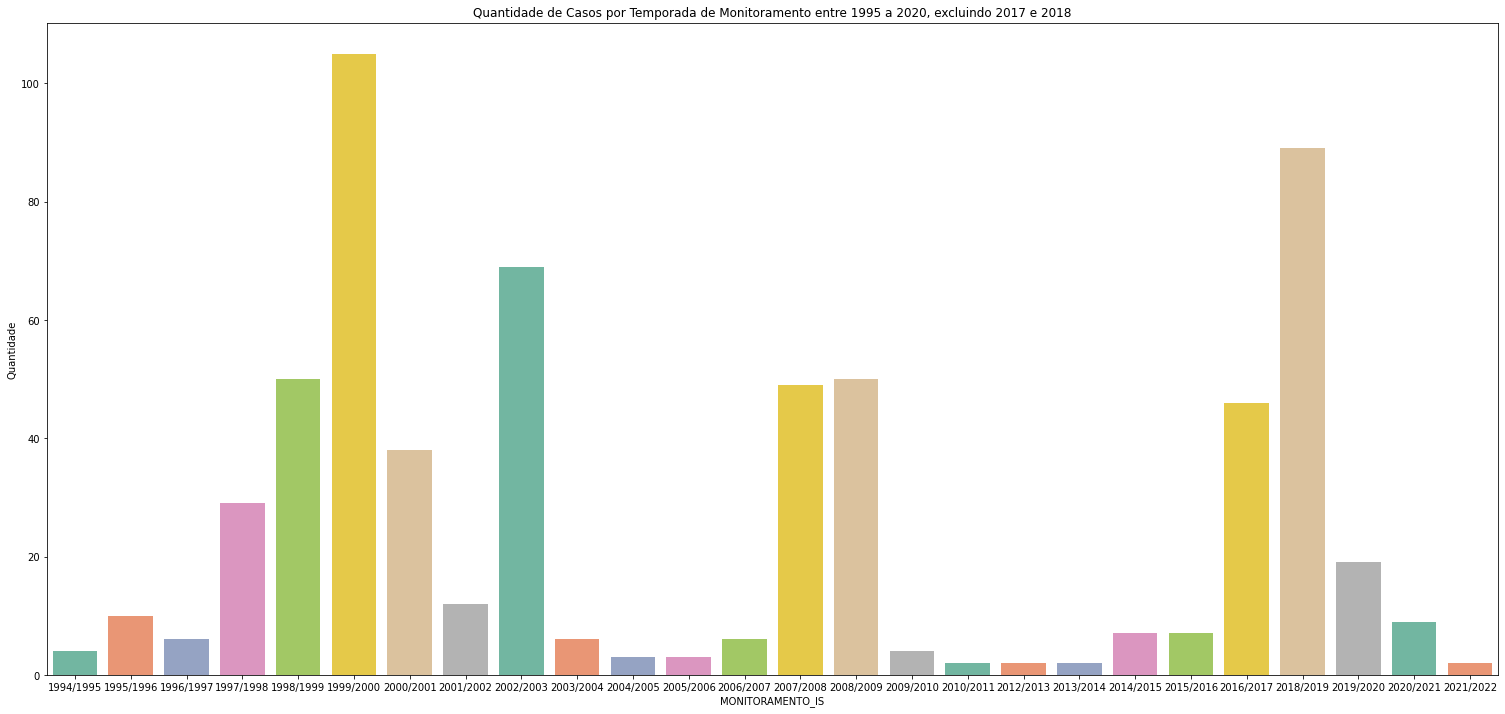

In [53]:
#Casos documentados por temporada de monitoramento
plt.figure(figsize = (26,12))
sns.countplot(x=casosrest['MONITORAMENTO_IS'], data=casosrest, palette="Set2")
plt.ylabel('Quantidade')  
plt.title('Quantidade de Casos por Temporada de Monitoramento entre 1995 a 2020, excluindo 2017 e 2018')